<a href="https://colab.research.google.com/github/Anish-S-tech/my-ml-journey/blob/main/implementation_of_Decision_Tree_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Importing the libraries

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Step 2: Loading the dataset

data = load_iris()
X = data.data
y = data.target

In [ ]:
# Step 3: Splitting the dataset

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
# Step 4: Defining the model

classifier = DecisionTreeClassifier(random_state=1)

In [ ]:
# Step 5: training the model

classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
# Step 6: Making predictions

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"The accuracy score is {accuracy: .4f}")

The accuracy score is  1.0000


In [ ]:
# Step 7: Hyperparameter tuning with Decision Tree regressor using GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth' : range(1,10,1),
    'min_samples_leaf': range(1,20,2),
    'min_samples_split': range(2,20,2),
    'criterion': ['entropy','gini']
}

tree = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(estimator = tree, param_grid=param_grid, cv=5, verbose=True)

grid_search.fit(X_train,y_train)

print("Best accuracy:",grid_search.best_score_)
print(grid_search.best_estimator_)
print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
Best accuracy: 0.9428571428571428
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       random_state=1)
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}


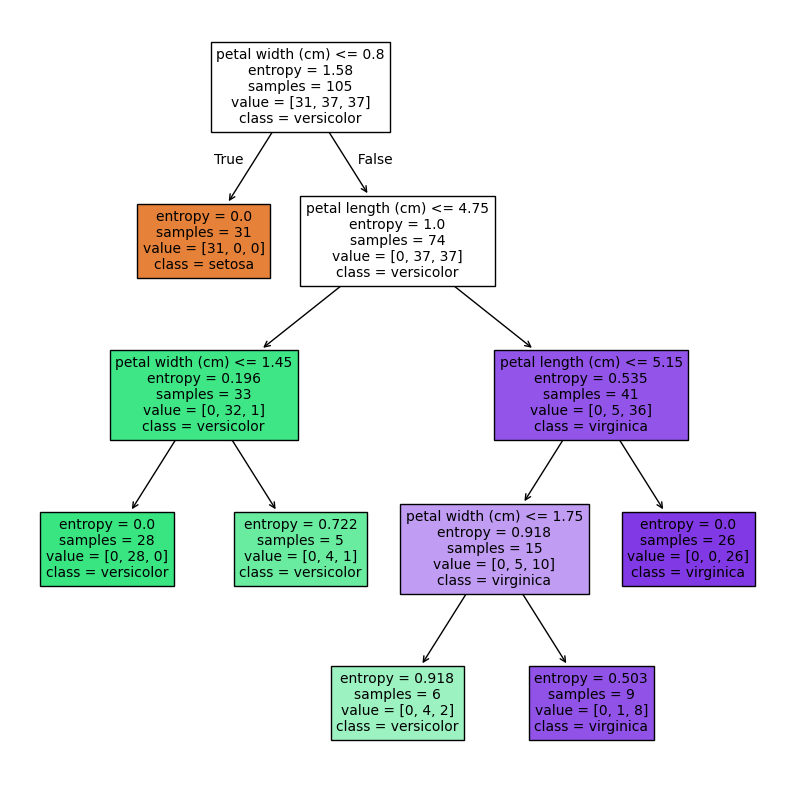

In [ ]:
# Step 8: Visualizing the Decision Tree classifier

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_clf = grid_search.best_estimator_

plt.figure(figsize=(10,10))

plot_tree(
    tree_clf,
    filled=True,
    feature_names = data.feature_names,
    class_names = data.target_names
)

plt.show()